In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Direct Random Weighted Graphs


In [ ]:
# Setting the seed
np.random.seed(2060685 + 2139662 + 2139221)

### Random Weight
This class is responsible to manage the edge behaviour

In [ ]:
class RandomWeight:
    def __init__(self, mean, standard_deviation):
        self.mean = mean
        self.standard_deviation = standard_deviation

    def __str__(self):
        return f"N({round(self.mean, 2)}, {round(self.standard_deviation**2, 2)})"

    def sample(self):
        return np.random.normal(loc = self.mean, scale = self.standard_deviation)

### DRWG
This class will represent our model

In [ ]:
class DRWG:
    # Default values
    _N = 10
    _P = .3
    _MEAN_INTERVAL = (1, 5)
    _STD_INTERVAL = (2, 4)
    _SEED = 2060685 + 2139662 + 2139221
    _FIGSIZE = (10, 10)
    _WITH_LABELS = True
    _NODE_COLOR = "lightblue"
    _EDGE_COLOR = "gray"
    _NODE_SIZE = 500
    _FONT_SIZE = 10
    _ARROWSIZE = 20
    _FONT_COLOR = "red"

    def __init__(self, n = _N, p = _P, seed = _SEED):
        self.graph : nx.DiGraph = nx.fast_gnp_random_graph(n, p, seed, directed = True)
        for u, v in self.graph.edges():
            # Assegna direzione casuale: da u a v o da v a u
            random_mean = np.random.uniform(self._MEAN_INTERVAL[0], self._MEAN_INTERVAL[1])
            random_std = np.random.uniform(self._STD_INTERVAL[0], self._STD_INTERVAL[1])
            rw = RandomWeight(random_mean,random_std)
            self.graph[u][v]['label'] = rw.__str__()
            self.graph[u][v]['random_weight'] = rw

    def plot(self, figsize = _FIGSIZE, seed = _SEED, with_labels = _WITH_LABELS, node_color = _NODE_COLOR, edge_color = _EDGE_COLOR, node_size = _NODE_SIZE, font_size = _FONT_SIZE, font_color = _FONT_COLOR, arrowsize = _ARROWSIZE):
        # Draws the graph
        plt.figure(figsize = figsize)
        # Nodes position layout
        pos = nx.spring_layout(self.graph, seed)
        # Draws nodes and arcs
        nx.draw(self.graph, pos, with_labels = with_labels, node_color = node_color, edge_color = edge_color, node_size = node_size, font_size = font_size, arrowsize = arrowsize)

        # Disegna le etichette degli archi
        edge_labels = nx.get_edge_attributes(self.graph, 'label')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels = edge_labels, font_color = font_color, font_size = font_size)

        plt.title("Grafo")
        plt.show()


    def sample(self) -> nx.DiGraph:
        sample_graph = nx.DiGraph()
        for u, v in self.graph.edges():
            sample = self.graph.get_edge_data(u,v)["random_weight"].sample()
            sample_graph.add_edge(u, v, label=round(sample,2), random_weight= sample)

        return sample_graph

    def plot_graph(self, graph):
        # Draws the graph
        plt.figure(figsize = self._FIGSIZE)
        # Nodes position layout
        pos = nx.spring_layout(graph, self._SEED)
        # Draws nodes and arcs
        nx.draw(graph, pos, with_labels = self._WITH_LABELS, node_color = self._NODE_COLOR, edge_color = self._EDGE_COLOR, node_size = self._NODE_SIZE, font_size = self._FONT_SIZE, arrowsize = self._ARROWSIZE)

        # Disegna le etichette degli archi
        edge_labels = nx.get_edge_attributes(graph, 'label')
        nx.draw_networkx_edge_labels(graph, pos, edge_labels = edge_labels, font_color = self._FONT_COLOR, font_size = self._FONT_SIZE)

        plt.title("Grafo")
        plt.show()

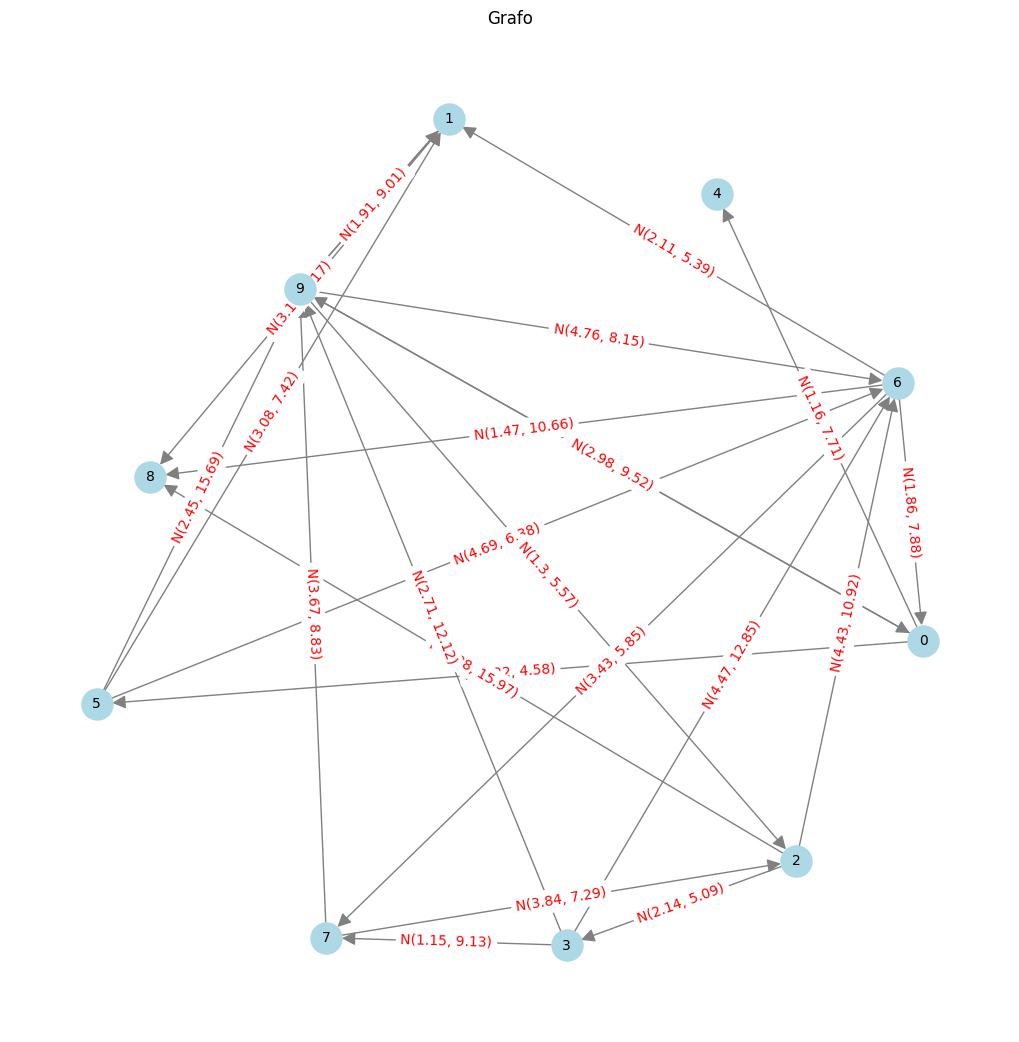

In [ ]:
g1 = DRWG()
g1.plot()

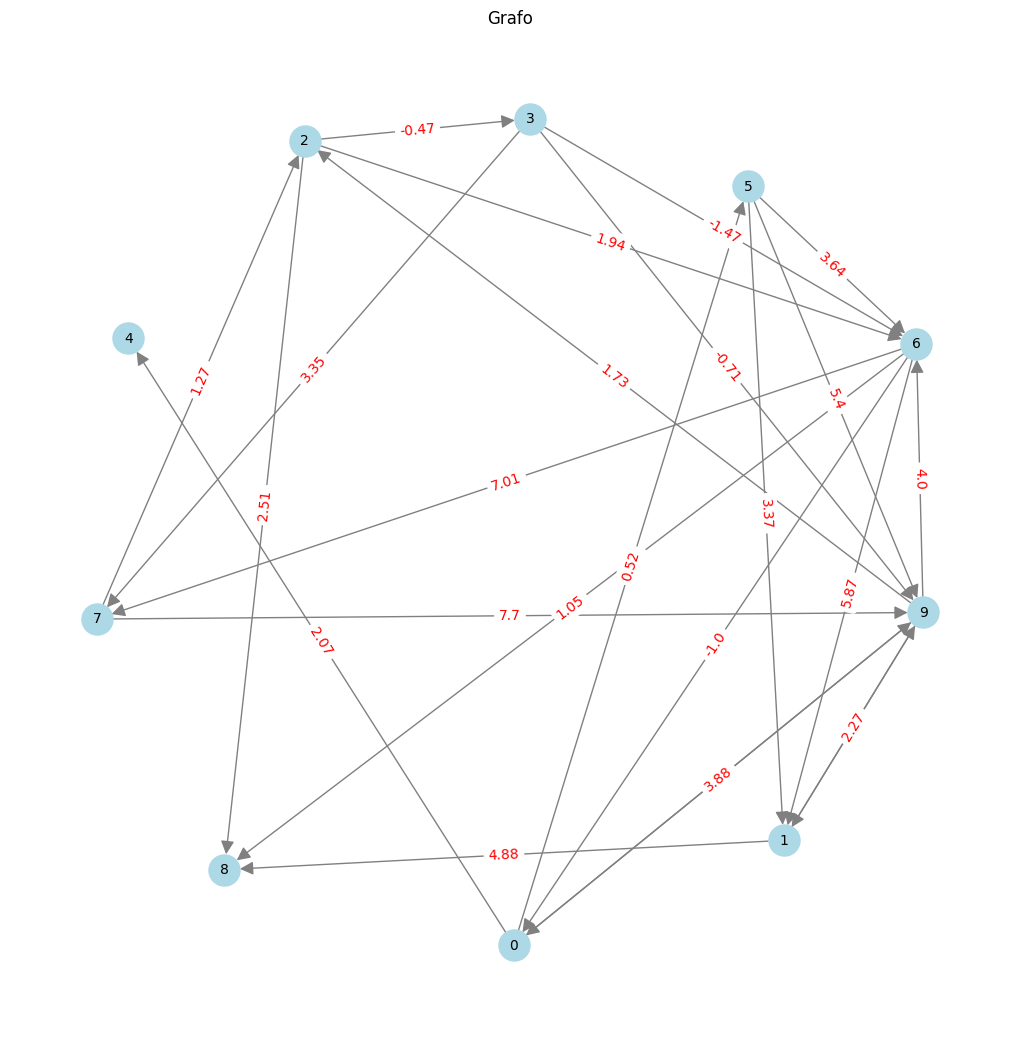

In [ ]:
sample = g1.sample()
g1.plot_graph(sample)


## Random Weighted Degree

In un sample,

$ d_w^+(u) = \sum_{v \in \mathcal{N}(u)} w(u, v) $  
$ d_w^-(u) = \sum_{v \in \mathcal{N}(u)} w(v, u) $

dato che $ W(u, v) \sim \mathcal{N}(\mu_{(u, v)}, \sigma^2_{(u, v)}) $  
$ d_W^-(u) = \sum_{v \in \mathcal{N}(u)} W(v, u) \sim \mathcal{N}(\sum_{v \in \mathcal{N}(u)} \mu_{(v, u)}, \sigma^2_{(v, u)})$  

$P_r(d_W^-(u)\leq 5) = \Phi(5) $

$P_r(1 \leq d_W^-(u)\leq 5) = \Phi(5) -  \Phi(1)$

$d^+_w(G) = max(d_w^+(u))$